In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(8,5)

# Linear Regression

簡易的 linear regression 實驗

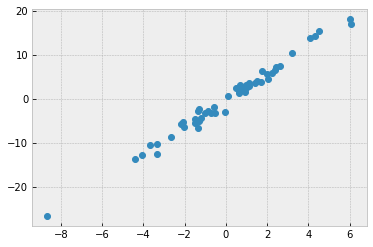

In [3]:
# 產生隨機數據
X = np.random.normal(0, 3, size=(50,1))
Y = X @ [3] + np.random.normal(0, size=50)
# 畫出來看看
plt.plot(X, Y, 'o');

In [4]:
# 用 numpy 的 lstsq
a = np.linalg.lstsq(X, Y)[0]
a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([3.08419646])

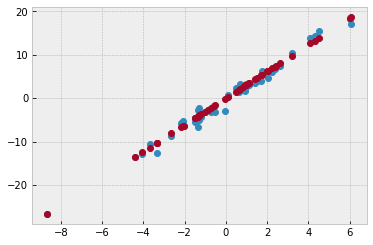

In [5]:
# 畫出來
plt.plot(X, Y, 'o')
plt.plot(X, X @ a, 'o');

## Q 
如何加上常數項？

Hint: 使用 `np.concatenate`, `np.ones_like`

a= [ 3.05400425 14.92004212]


q_lstsq.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = np.linalg.lstsq(X, Y)[0]


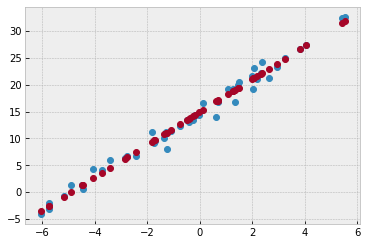

In [6]:
%run -i q_lstsq.py

## 用 sklearn

In [7]:
from sklearn import linear_model

In [8]:
X = np.random.normal(0, 3, size=(50,1))
Y = X @ [3] + 4 +np.random.normal(0, size=50)

In [9]:
regr = linear_model.LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
regr.fit(X,Y)
print(regr.coef_, regr.intercept_)

[2.94176559] 4.1465255029829615


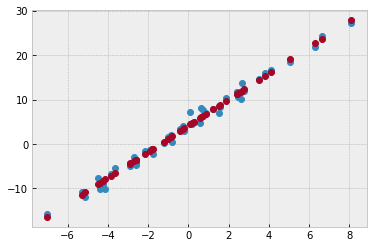

In [11]:
# 畫出來
plt.plot(X, Y, 'o')
plt.plot(X, regr.predict(X), 'o');

## Q
畫出 `test_X = np.linspace(-10,10, 100)` 的圖形

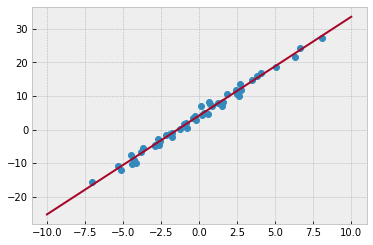

In [12]:
%run -i q_linear_test.py

### 使用 sklearn 的 datasets

In [13]:
from sklearn import datasets

In [15]:
datasets.load_diabetes?

In [14]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [17]:
import scipy.stats

In [18]:
scipy.stats.describe(diabetes.target)

DescribeResult(nobs=442, minmax=(25.0, 346.0), mean=152.13348416289594, variance=5943.331347923785, skewness=0.43906639932477265, kurtosis=-0.8866436055681386)

In [19]:
idx = np.arange(diabetes.data.shape[0])
np.random.shuffle(idx)
X = diabetes.data[idx]
y = diabetes.target[idx]

試試看 linear regression

3889.401617355746

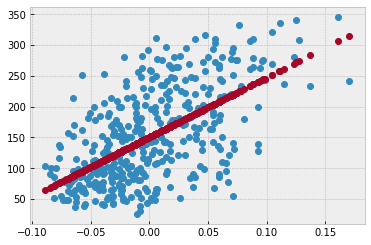

In [20]:
train_X = X[:-50, 2:3]
train_y = y[:-50]
test_X = X[-50:, 2:3]
test_y = y[-50:]
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
plt.plot(train_X, train_y, 'o');
plt.plot(train_X, regr.predict(train_X), 'o');
np.mean((regr.predict(train_X)-train_y)**2)

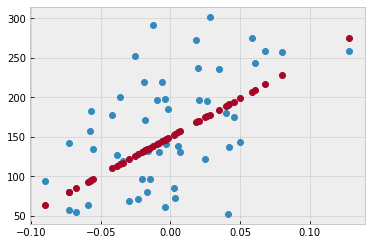

In [21]:
plt.plot(test_X, test_y, 'o');
plt.plot(test_X, regr.predict(test_X), 'o');

### 用所有變數

In [22]:
train_X = X[:-50]
train_y = y[:-50]
test_X = X[-50:]
test_y = y[-50:]
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
np.mean((regr.predict(train_X)-train_y)**2)

2828.8502132169374

In [23]:
np.mean((regr.predict(test_X)-test_y)**2)

3132.279873209971

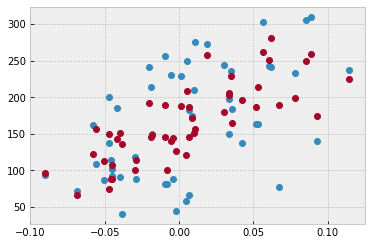

In [21]:
plt.plot(test_X[:, 2:3], test_y, 'o');
plt.plot(test_X[:, 2:3], regr.predict(test_X), 'o');

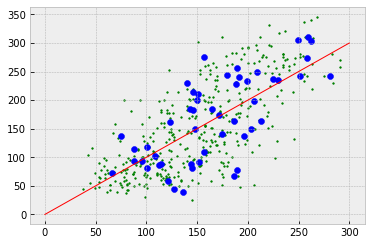

In [22]:
plt.scatter(regr.predict(train_X), train_y, c='g', s=3)
plt.scatter(regr.predict(test_X), test_y, c='b')
plt.plot([0,300],[0,300],'r', linewidth=1);

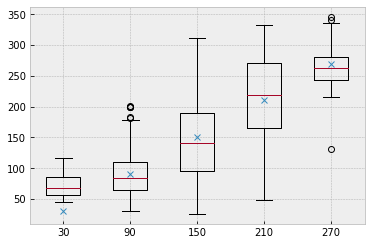

In [23]:
groups = np.arange(30,300,60)
predict_y=regr.predict(train_X)
plt.boxplot([train_y[(predict_y>=i-30)&(predict_y< i+30)] for i in groups], labels=groups);
plt.plot(np.arange(1,len(groups)+1), groups,'x');

## Overfitting

https://tjwei.github.io/NeuralNetwork-Jobspace-slides/#/7

### Regularization
$\frac{1}{2  n} \left\Vert y - Xw\right\Vert_2^2 + α \left\Vert w \right\Vert_1$


In [24]:
regr = linear_model.Lasso(alpha=0.001)
regr.fit(train_X, train_y)
np.mean((regr.predict(train_X)-train_y)**2)

2868.068181209557

In [25]:
np.mean((regr.predict(test_X)-test_y)**2)

2811.372293724

### Cross validation
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

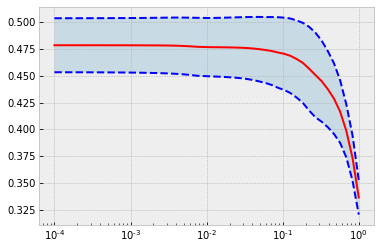

In [26]:
from sklearn import model_selection
α_space = np.logspace(-4, 0, 50)
scores =[]
for α in α_space:    
    regr.alpha = α
    s = model_selection.cross_val_score(regr, train_X, train_y, cv=3)
    scores.append((s.mean(), s.std()))
scores=np.array(scores).T
plt.semilogx(α_space, scores[0], 'r')
plt.semilogx(α_space, scores[0]+scores[1],'b--')
plt.semilogx(α_space, scores[0]-scores[1],'b--')
plt.fill_between(α_space, scores[0] + scores[1], scores[0] - scores[1], alpha=0.2);

In [27]:
regr = linear_model.LassoCV(alphas = α_space, cv=5)
regr.fit(train_X, train_y)
print(regr.alpha_)
np.mean((regr.predict(train_X)-train_y)**2)

0.0029470517025518097


2868.8777122974125

In [28]:
np.mean((regr.predict(test_X)-test_y)**2)

2818.909996664069

### 用 Linear regression 來 classification ?

0.20814279434958238

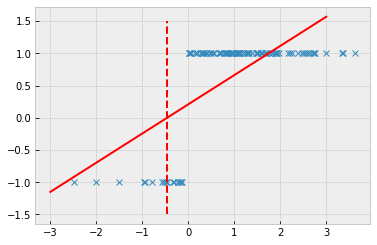

In [41]:
X = np.random.normal(1, size=(100,1))
y = (X[:,0]>0).ravel()*2-1
regr = linear_model.LinearRegression().fit(X, y)
test_X=np.linspace(-3,3,10).reshape(-1,1)
plt.plot(X, y, 'x');
plt.plot(test_X, regr.predict(test_X), 'r')
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--')
regr.intercept_

In [35]:
regr.intercept_

0.36444494284197493

## MNIST

In [24]:
import gzip
import pickle
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
    
train_X, train_y = train_set
test_X, test_y = test_set

In [25]:
regr.fit(train_X, train_y)
regr.predict(test_X)

array([6.2875795, 2.5334442, 1.6669242, ..., 7.7995696, 5.309804 ,
       5.768165 ], dtype=float32)

In [26]:
predict_y = np.floor(regr.predict(train_X)+0.5).astype('int').clip(0,9)
np.mean(predict_y == train_y)

0.23392

In [27]:
predict_y = np.floor(regr.predict(test_X)+0.5).astype('int').clip(0,9)
np.mean(predict_y == test_y)

0.2278

準確率約 23% 很低

### One hot encoding

In [28]:
train_Y = np.zeros(shape=(train_y.shape[0], 10))
train_Y[np.arange(train_y.shape[0]), train_y] = 1

In [31]:
train_y[1]

0

In [33]:
train_Y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(train_y.reshape(-1,1))
onehot_encoder.transform(train_y.reshape(-1,1)).toarray()[0]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [35]:
# 訓練模型
regr.fit(train_X, train_Y)

# 用 argmax 得到結果
predict_y = np.argmax(regr.predict(train_X), axis=1)
# 計算正確率
np.mean(predict_y == train_y)

0.85664

## Q
試試看 test accuracy

In [36]:
%run -i q_minst_linear_regression.py

0.8611


## Q
用 PCA 先處理過 試試看